# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read file using pandas.

# View sample data

In [2]:
# Your code to read the dataset
df = pd.read_csv("hazelnut.csv")
# Your code to Print sample dataset
df.head()

,sample_id,length,width,thickness,surface_area,mass,compactness,hardness,shell_top_radius,water_content,carbohydrate_content,variety
0,71,11.67,12.8025,8.055075,34.65,1375.50,0.93005,19.145,4.4604,0.048668,0.175,c_avellana
1,72,13.86,13.0995,7.349907,38.10,1439.55,0.93401,8.780,4.7844,0.048826,0.167,c_avellana
2,1,20.53,15.5925,9.565427,49.89,1623.30,0.96217,5.120,5.2893,0.049521,0.174,c_americana
3,73,14.13,12.2220,7.182949,35.43,1412.25,0.90178,13.694,4.8168,0.049595,0.167,c_avellana
4,2,15.85,14.7240,8.622661,43.29,1512.00,0.96261,10.925,4.6296,0.050384,0.173,c_americana


# Print the shape of the pandas dataframe

In [3]:
# Print the shape of the dataframe
df.shape

(201, 12)

# Separate the dataframe into input matrix X and output vector y

In [4]:
X = df.drop('variety',axis=1).values
y = df['variety'].values

# Import the SKlearn methods

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score


# Split the data into train and test sets - X_train, X_test, y_train, y_test.

# Use test size of 40%.

## Hint: Use Sklearn function: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [6]:
# Your code to separate train and test sixe.
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.40, random_state=42)
# Your code to Print the shapes of the X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_train.shape)

(120, 11)
(81, 11)
(120,)
(120,)


# Scale the dataset between 0-1.

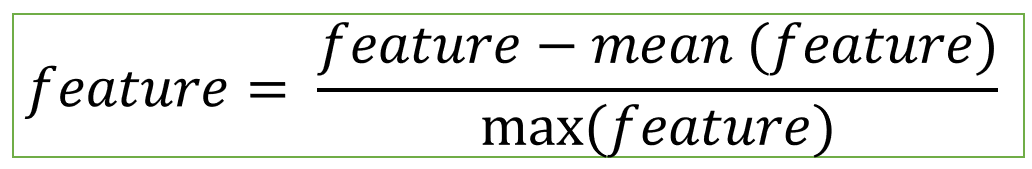

In [7]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Implement Knn classifer using sklearn.

# Use number of neigbours as 3.

In [8]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Make predictions on the test sample X_test.

# Print predicted values.

# Print actual test values.

# Are predicted and actual values are equal?

In [9]:
y_pred = knn.predict(X_test)
print (y_pred)
print (y_test)

['c_avellana' 'c_americana' 'c_americana' 'c_avellana' 'c_cornuta'
 'c_avellana' 'c_cornuta' 'c_avellana' 'c_americana' 'c_americana'
 'c_avellana' 'c_cornuta' 'c_cornuta' 'c_avellana' 'c_americana'
 'c_americana' 'c_americana' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_cornuta' 'c_americana' 'c_cornuta' 'c_americana' 'c_cornuta'
 'c_americana' 'c_cornuta' 'c_avellana' 'c_americana' 'c_americana'
 'c_cornuta' 'c_avellana' 'c_americana' 'c_americana' 'c_avellana'
 'c_americana' 'c_avellana' 'c_cornuta' 'c_americana' 'c_cornuta'
 'c_americana' 'c_americana' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_avellana' 'c_avellana' 'c_cornuta' 'c_cornuta' 'c_cornuta'
 'c_americana' 'c_cornuta' 'c_cornuta' 'c_americana' 'c_avellana'
 'c_cornuta' 'c_avellana' 'c_americana' 'c_cornuta' 'c_americana'
 'c_cornuta' 'c_americana' 'c_avellana' 'c_avellana' 'c_americana'
 'c_americana' 'c_cornuta' 'c_americana' 'c_avellana' 'c_avellana'
 'c_avellana' 'c_americana' 'c_avellana' 'c_avellana' 'c_avellana'
 'c

# Print accuracy for training and test set.

In [10]:
print (knn.score(X_train, y_train))
print (knn.score(X_test, y_test))

0.9833333333333333
0.9506172839506173


# Print Classification report - Precision, Recall, and F-score.

In [11]:
print (classification_report(y_test, y_pred))

print (print("Validation Accuracy: ", accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

 c_americana       0.90      1.00      0.95        27
  c_avellana       0.96      0.93      0.94        27
   c_cornuta       1.00      0.93      0.96        27

    accuracy                           0.95        81
   macro avg       0.95      0.95      0.95        81
weighted avg       0.95      0.95      0.95        81

Validation Accuracy:  0.9506172839506173
None


# Display Confusion Matrix

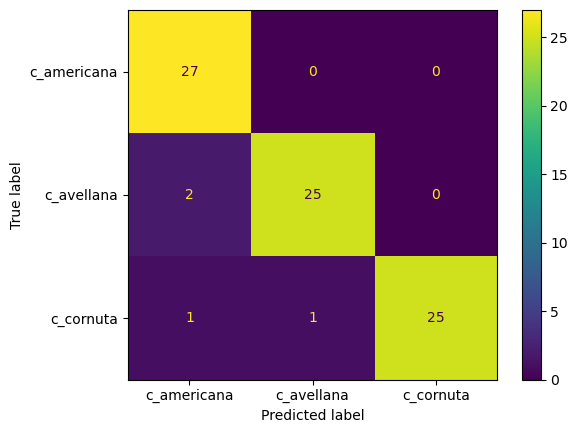

In [12]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)
disp.plot()
plt.show()

# Till now, we implemented the KNN for number of neigbours 3.
# Now, we will check the accuracy for number of neighbours 1- 10 - all values, and will plot accuracy.

In [13]:
# Your code to create an empty list train_scores
train_scores = []
# Your code to create an empty list test_scores
test_scores = []
# Your code to create a list neighbours having values [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]. You can create numpy array and use np.arange function.
neighbours = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for neighbour in neighbours:##...... in #.......: # Your code to fill in the for loop.
  # Create a knn classifier object for particular neigbour value.
    knn = KNeighborsClassifier(n_neighbors = neighbour)

  # Fit the classifier on X_train, y_train
    knn.fit(X_train, y_train)
  # Make predictions on train data.  Store the values in train_pred variable.
    train_pred = knn.predict(X_train)
  # Make predictions on test data.  Store the values in test_pred variable.
    test_pred = knn.predict(X_test)
  # Find accuracy for train data. Hint - use accuracy_score method in sklearn.
    train_score = accuracy_score(y_train, train_pred)
  # Find accuracy for test data. Hint - use accuracy_score method in sklearn.
    test_score = accuracy_score(y_test, test_pred)
  # Append training accuracy in list train_scores.
    train_scores.append(train_score)
  # Append test accuracy in list test-scores.
    test_scores.append(test_score)



# Plot the accuracy for number of neigbours 1-10.

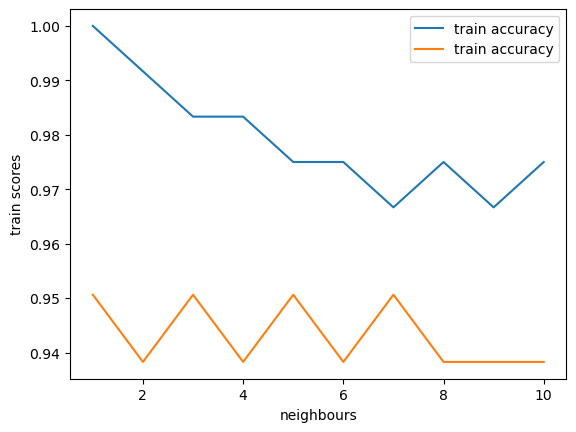

In [14]:
#
# Your code to plot neigbours vs train scores. Proivide label name as the 'train accuracy'

#plt.figure(num=1, figsize=(15,7))
plt.plot(neighbours, train_scores, label='train accuracy')
plt.plot(neighbours, test_scores, label='train accuracy')
plt.xlabel('neighbours')
plt.ylabel('train scores')
plt.legend()

plt.show()
# Your code to plot neigbours vs test scores. Provide label bame as the 'test accuracy'.


# Let's implement other ML algorithm that we studied -  Logistic Regression and MLP.

# We will do the same task using Logistic Regression and MLP.

## Implement Logistic Regression and MLP for the same problem and compare accuracy of the three classifiers using Bar plot:


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html


In [15]:
test_scores_models = []
test_scores_models.append(test_scores[4])

In [16]:
#
# Your code to implement Logistic regression and MLP based classifier.
logisticRegression = LogisticRegression(random_state = 0)
logisticRegression.fit(X_train, y_train)
# You could split this code into multiple cells
#

LogisticRegression(random_state=0)

In [25]:
y_pred = LogisticRegression(X_test)


In [22]:
print(logisticRegression.score(X_train, y_train))
print(logisticRegression.score(X_test, y_test))

0.9916666666666667
0.9629629629629629


In [23]:
#adding accuracy value of logistic Regression5
test_scores_models.append(logisticRegression.score(X_test, y_test))

In [24]:
print(classification_report(y_test, y_pred))
print("Validation Accuracy: ",accuracy_score(y_test, y_pred))

InvalidParameterError: The 'y_pred' parameter of classification_report must be an array-like or a sparse matrix. Got LogisticRegression(penalty=array(['c_avellana', 'c_americana', 'c_americana', 'c_avellana',
       'c_cornuta', 'c_avellana', 'c_cornuta', 'c_avellana',
       'c_americana', 'c_americana', 'c_avellana', 'c_cornuta',
       'c_cornuta', 'c_avellana', 'c_americana', 'c_americana',
       'c_americana', 'c_avellana', 'c_americana', 'c_cornuta',
       'c_cornuta', 'c_americana', 'c_cornuta', 'c_americana',
       '...
       'c_americana', 'c_avellana', 'c_cornuta', 'c_avellana',
       'c_avellana', 'c_cornuta', 'c_americana', 'c_cornuta',
       'c_americana', 'c_avellana', 'c_avellana', 'c_americana',
       'c_americana', 'c_cornuta', 'c_americana', 'c_avellana',
       'c_avellana', 'c_avellana', 'c_americana', 'c_avellana',
       'c_avellana', 'c_avellana', 'c_cornuta', 'c_cornuta', 'c_avellana',
       'c_cornuta', 'c_avellana', 'c_americana'], dtype=object)) instead.

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(random_state=1, max_iter=350, verbose=True)
MLP.fit(X_train, y_train)

In [ ]:
y_pred_prob = MLP

# **Important** -  Lab logbook requirement:
# Put bar plot comparing the accracy of three models in you lablogbook.